<a href="https://colab.research.google.com/github/shahista-shaikh/diabetes-prediction-ml/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

### Check for Missing or Invalid Values

In [ ]:
#Some columns may contain zeros that are not valid for medical data.
cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

(df[cols_with_zero]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

*I used a hybrid imputation strategy for handling missing values. Since Insulin and SkinThickness have a large number of missing entries, I replaced them with the median to avoid unreliable estimates. For Glucose, BloodPressure, and BMI, I applied KNN imputation so the missing values are filled in based on patterns from similar records.*

In [ ]:
from sklearn.impute import KNNImputer

# Replace 0 with NaN in all medical columns
cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Median imputation for Insulin and SkinThikness
for col in["Insulin","SkinThickness"]:
    df[col].fillna(df[col].median(), inplace=True)

# KNN imputation for Glucose, BloodPressure, and BMI
knn_cols = ["Glucose","BloodPressure","BMI"]
imputer = KNNImputer(n_neighbors=5)

df[knn_cols] = imputer.fit_transform(df[knn_cols])

print(df.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Outcome Distribution

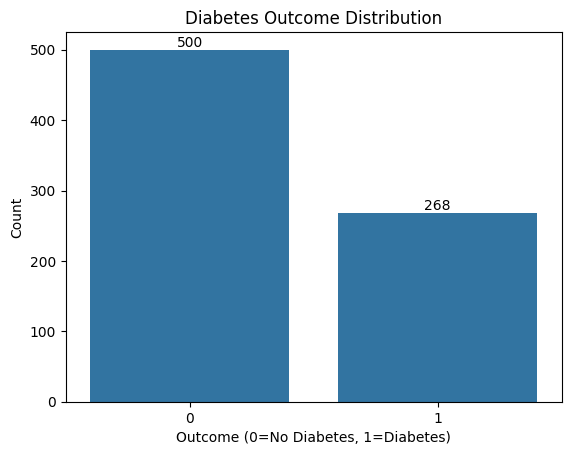

In [ ]:
ax=sns.countplot(x="Outcome",data=df)
ax.bar_label(ax.containers[0])
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.ylabel("Count")
plt.show()

### Histogram with KDE lines for all features

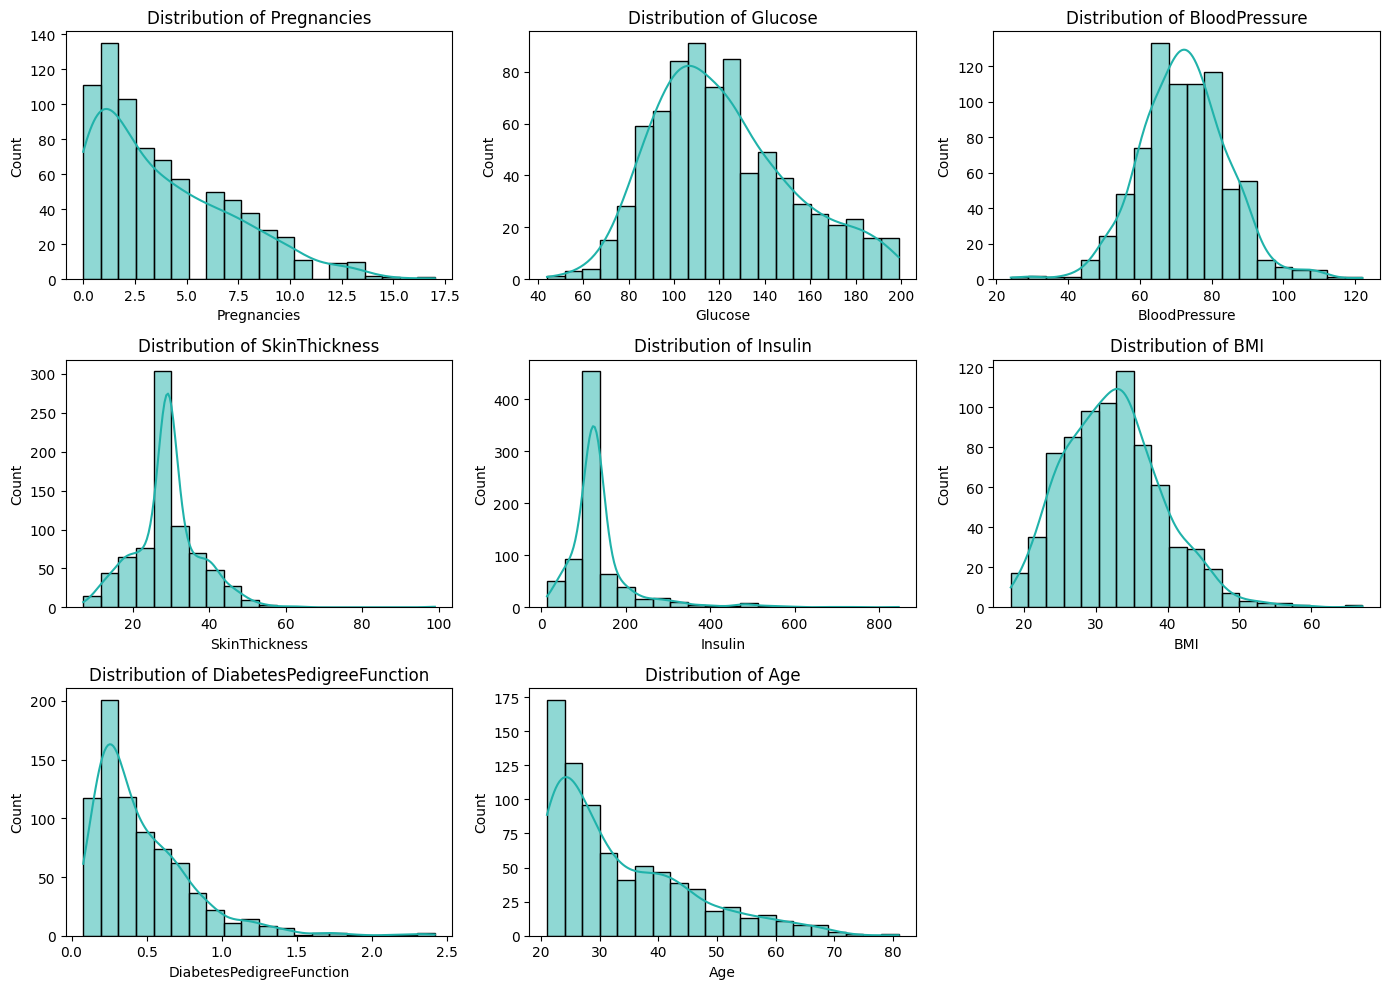

In [ ]:
#exclude target column
df_features=df.drop("Outcome",axis=1)
plt.figure(figsize=(14,10))

for i,col in enumerate(df_features.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=20, color="lightseagreen", edgecolor="black")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

*In this dataset, I noticed that many features have right-skewed distributions, such as Insulin, Pregnancies, DiabetesPedigreeFunction, and Age, where a few extreme cases push the values higher. Glucose and BMI are more balanced but still lean toward the higher side, while BloodPressure and SkinThickness look closer to a normal distribution. These patterns, along with the outliers, are important to consider before building predictive models.*

### Boxplots (spot outliers clearly)

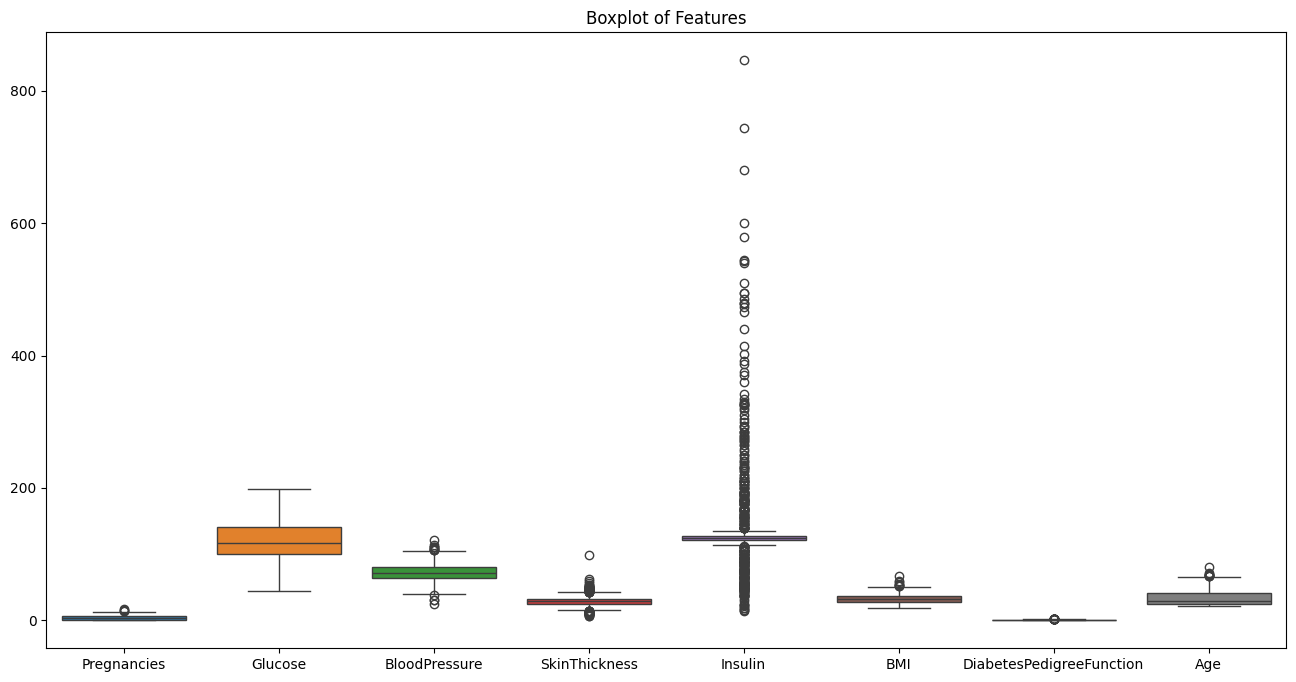

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df.drop("Outcome",axis=1),orient="v")
plt.title("Boxplot of Features")
plt.show()


*   *Pregnancies, Age, BMI, and BloodPressure show moderate outliers but remain within a reasonable range.*

*   *Glucose has some variation and a few outliers, but most values are clustered between 90â€“150.*

*   *SkinThickness is fairly concentrated, with some extreme points above 60.*

*   *Insulin stands out with a very large number of extreme outliers, reaching beyond 800, which makes its distribution highly skewed.*

*   *DiabetesPedigreeFunction has smaller values with fewer noticeable outliers.*

### Violin Plots by Outcome (distribution + diabetes comparison)

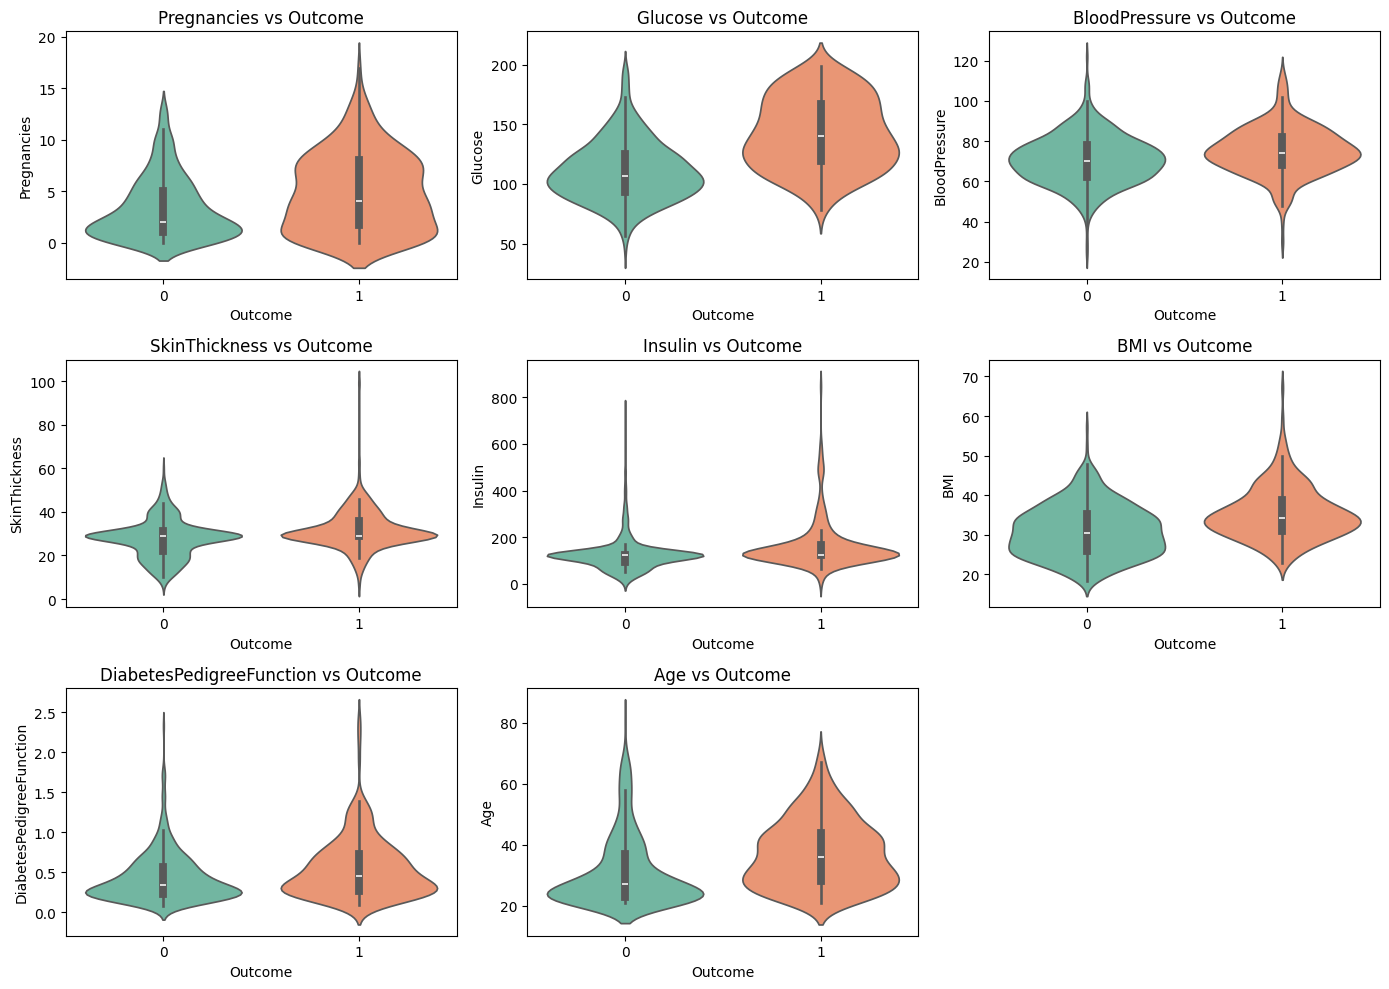

In [ ]:
plt.figure(figsize=(14,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.violinplot(x="Outcome", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

* *Glucose and BMI show clear separation between the two groups: higher glucose and BMI levels are strongly linked with diabetic outcomes.*

*   *Pregnancies also trend higher in diabetic cases, though with overlapping ranges.*

*   *BloodPressure and SkinThickness show mild differences, but the overlap suggests they may not be strong independent predictors.*

*  *Insulin shows high variability with extreme outliers in both groups, making its predictive power less clear without transformation.*



### Pairplot (relationships between features)

<Figure size 400x400 with 0 Axes>

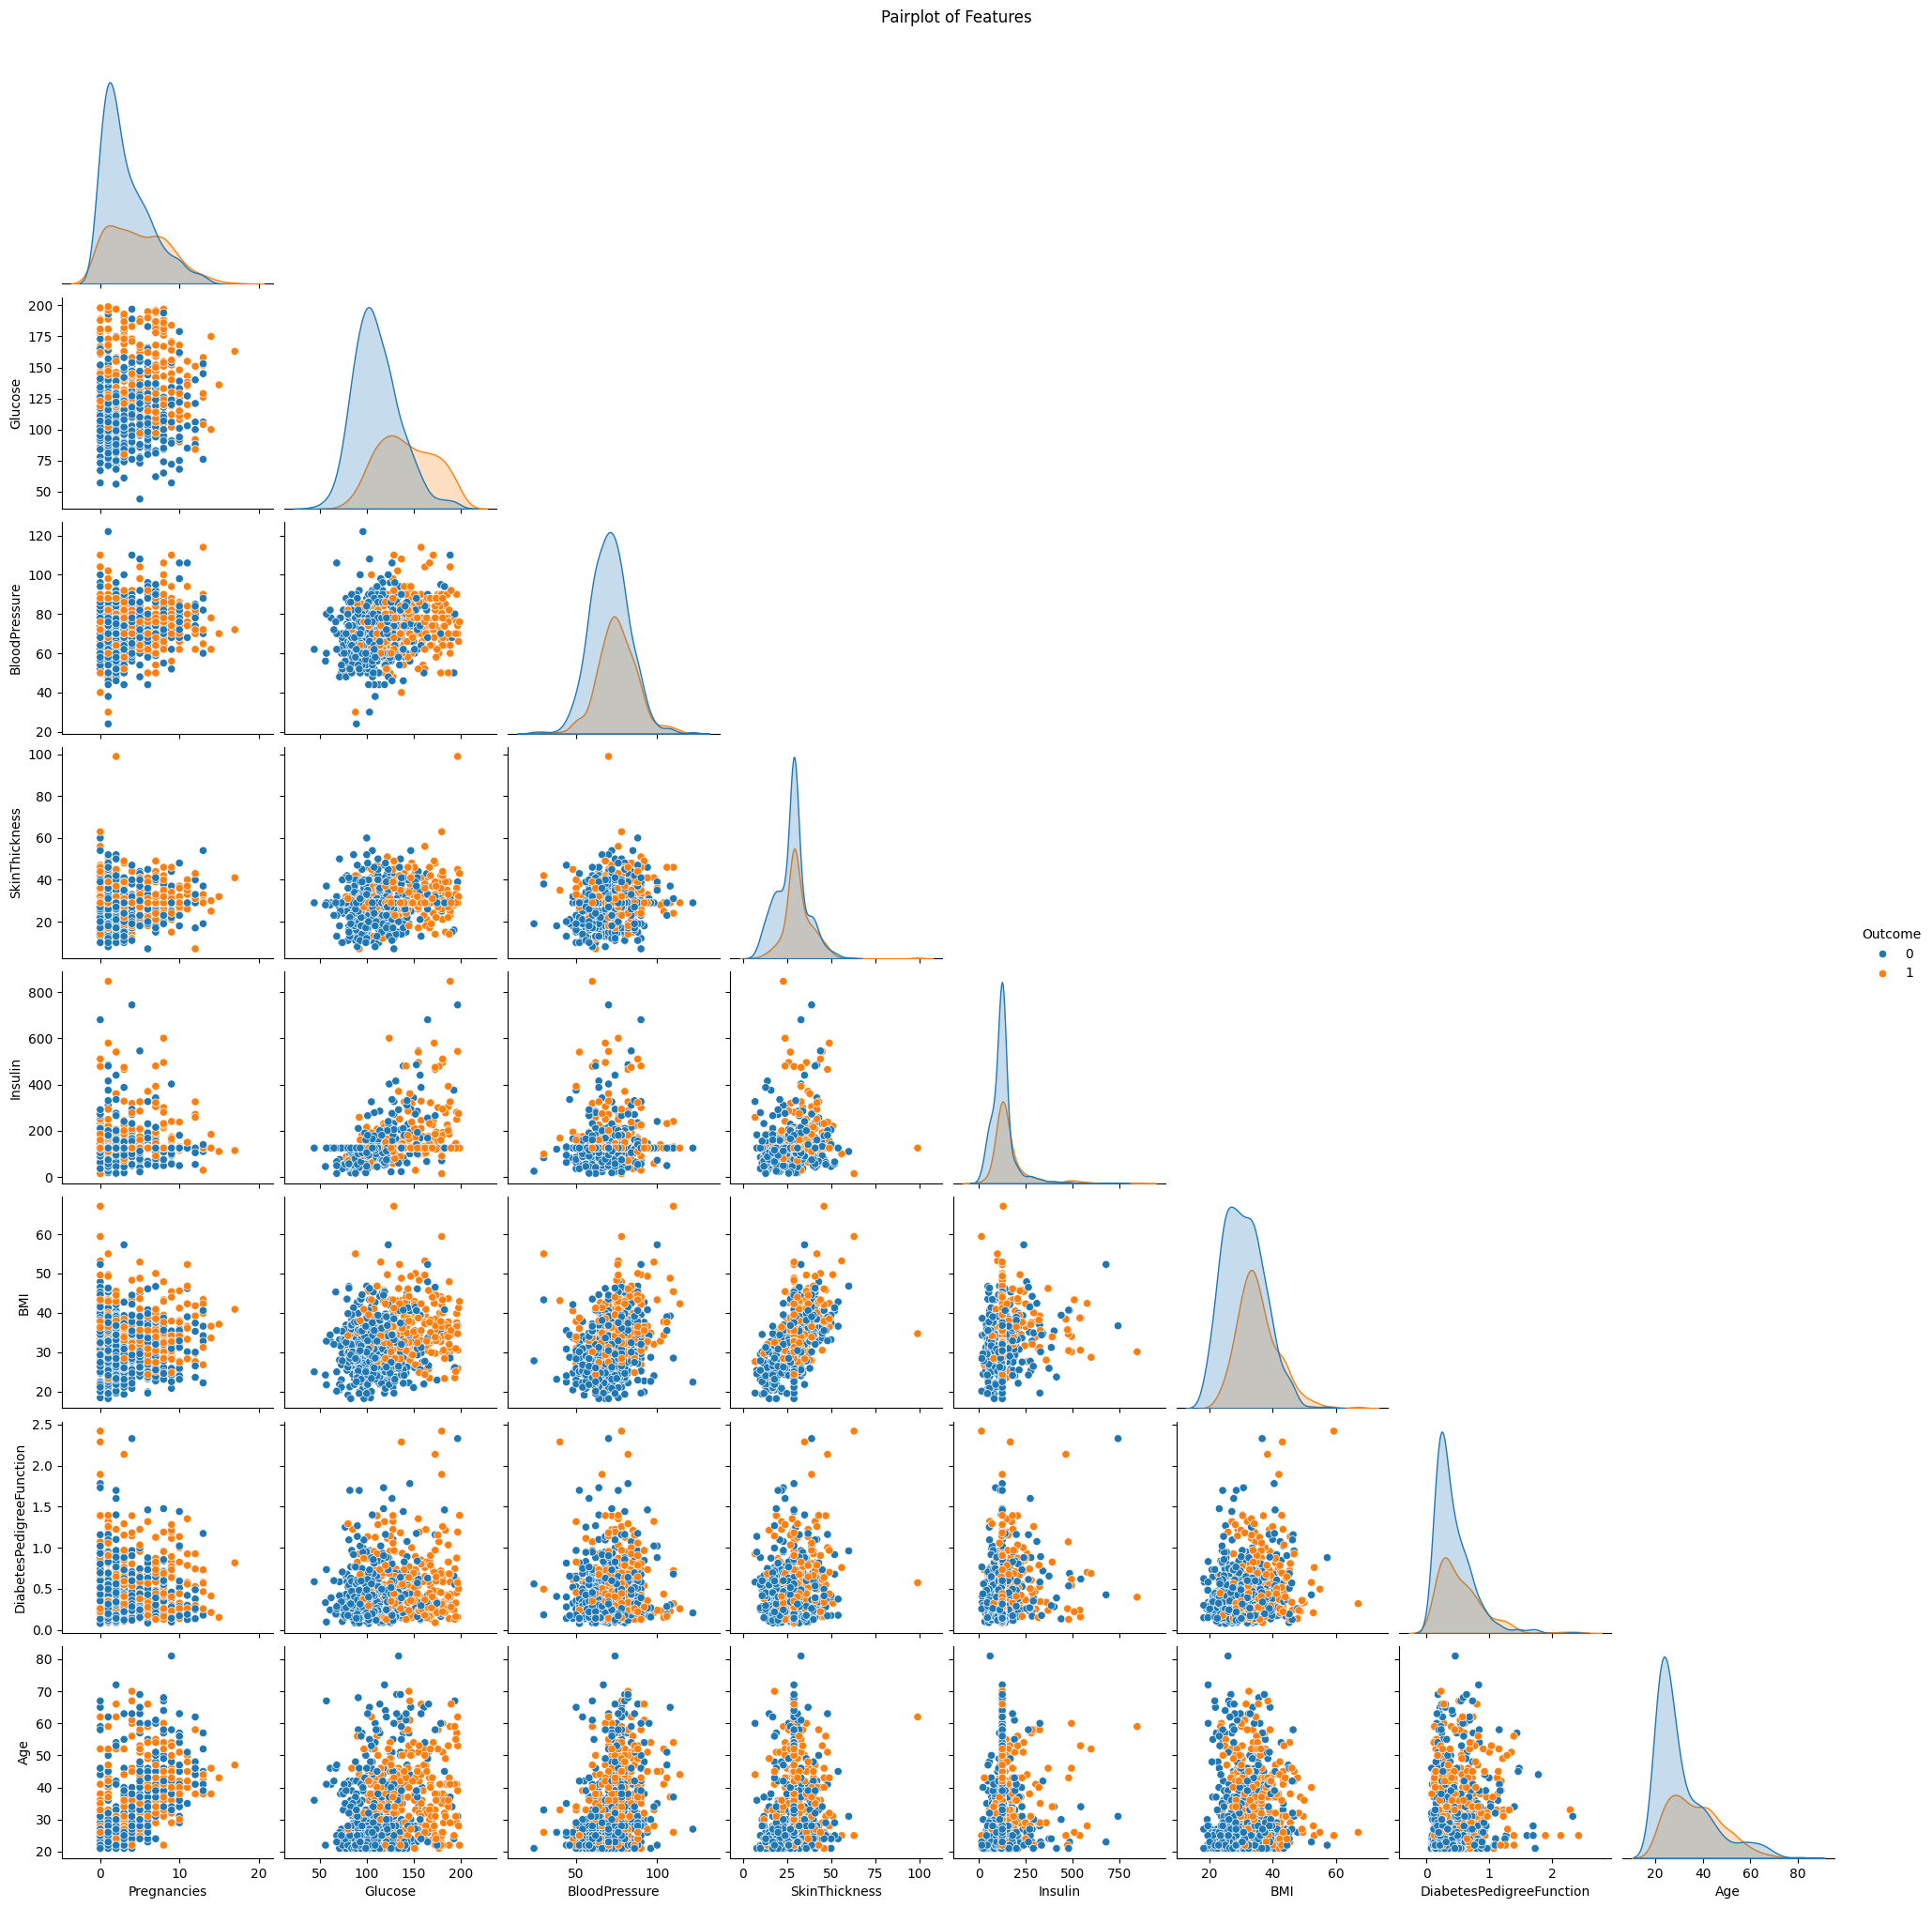

In [ ]:
plt.figure(figsize=(4,4))
sns.pairplot(df,hue="Outcome", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()



*   *Glucose: People with higher glucose levels (orange points) are much more likely to have diabetes. This is the clearest separation.*

*   *BMI: Higher BMI is also linked with diabetes, though not as strongly as glucose.*

*   *Age: Older people are more likely to fall in the diabetes group.*

*   *Pregnancies: More pregnancies slightly increase the chance of diabetes.*

*   *Other features (BloodPressure, SkinThickness, Insulin, PedigreeFunction): These overlap a lot between the two groups, but still might help when used with other features.*








.



### Correlation Heatmap

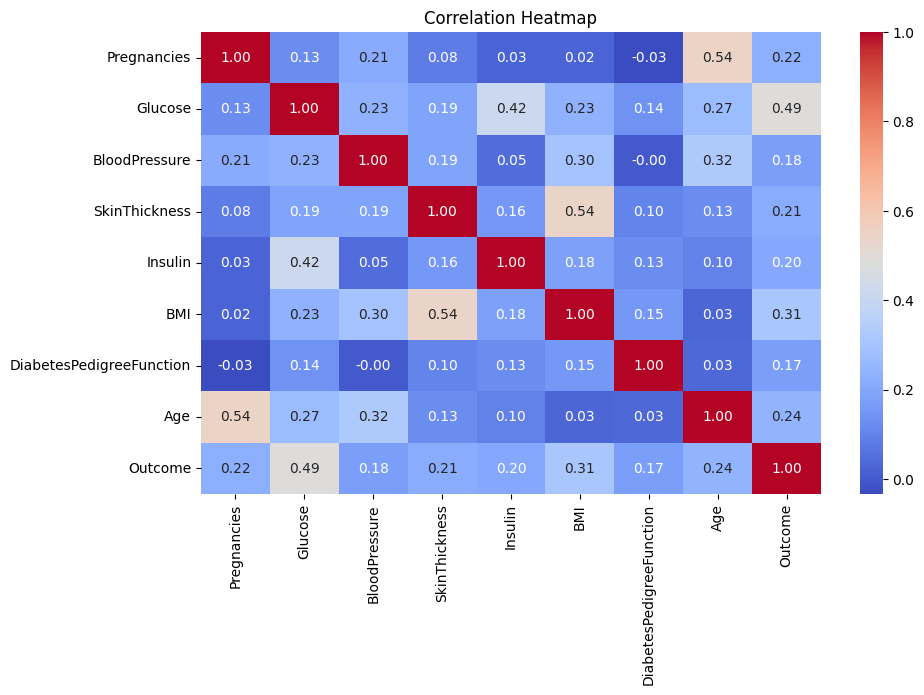

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**The heatmap shows how different features are related to each other and to the diabetes outcome.**

- **Glucose** has the strongest positive correlation with the outcome (0.49), making it the most important predictor.*
- **BMI (0.31)**, **Age (0.24)**, and **Pregnancies (0.22)** also show moderate positive correlation with the outcome.  
- **SkinThickness and BMI (0.54)** are highly correlated, which makes sense since higher BMI is often linked to greater skin thickness.  
- **Glucose and Insulin (0.42)** also show a moderate relationship.  

Overall, **Glucose, BMI, Age, and Pregnancies** are the key features most related to diabetes in this dataset.

### ML Models Building

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.694805   0.574468  0.500000  0.534653  0.650000
1  K-Nearest Neighbors  0.746753   0.666667  0.555556  0.606061  0.702778
2        Random Forest  0.753247   0.673913  0.574074  0.620000  0.712037
3    Gradient Boosting  0.753247   0.673913  0.574074  0.620000  0.712037
4              XGBoost  0.759740   0.673469  0.611111  0.640777  0.725556
5             LightGBM  0.772727   0.702128  0.611111  0.653465  0.735

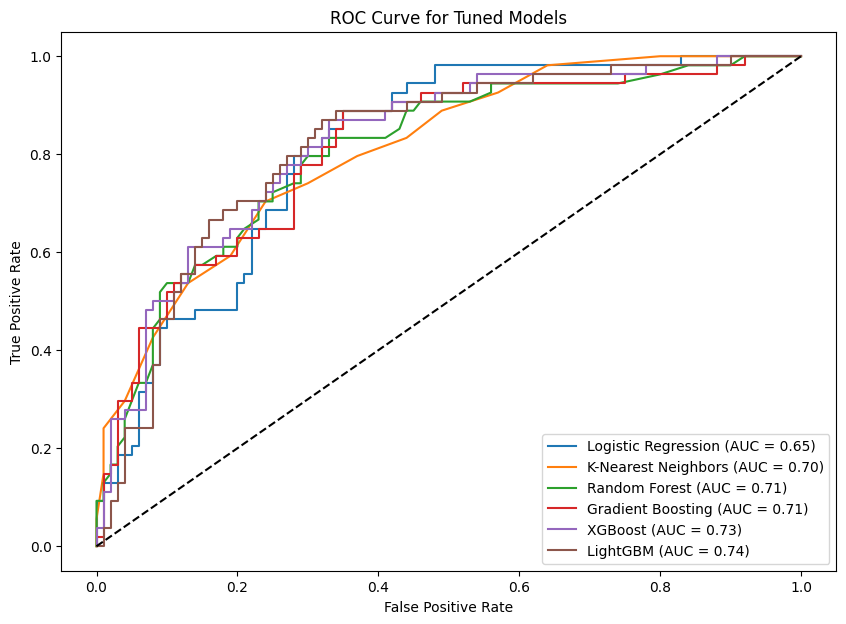

In [ ]:
import warnings
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve, auc

warnings.filterwarnings("ignore")

X=df.drop("Outcome",axis=1)
y=df["Outcome"]

# Train-Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Scale data for models that need it
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# models to try
models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Hyperparameter Grids

param_distributions = {
    "Logistic Regression": {"C":np.logspace(-3,3,7), "penalty":["l2"]},
    "K-Nearest Neighbors": {"n_neighbors": range(3,20), "weights":["uniform","distance"]},
    "Random Forest": {"n_estimators": [100, 200, 500], "max_depth": [3,5,10,None]},
    "Gradient Boosting": {"n_estimators": [100, 200, 500], "learning_rate": [0.01, 0.05, 0.1], "max_depth":[3,5,7]},
    "XGBoost": {"n_estimators": [100, 200, 500], "learning_rate": [0.01, 0.05, 0.1], "max_depth":[3,5,7]},
    "LightGBM": {"n_estimators": [100, 200, 500], "learning_rate": [0.01, 0.05], "num_leaves":[5,10,15], "max_depth":[3,5]}
}

# Train, Tune, Evaluate
results = []
roc_curves = {}

for name, model in models.items():
    # Use scaled data only for Logistic Regression and KNN
    X_train_use = X_train_scaled if name in ["Logistic Regression", "K-Nearest Neighbors"] else X_train
    X_test_use = X_test_scaled if name in ["Logistic Regression", "K-Nearest Neighbors"] else X_test


    # RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[name], n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
    random_search.fit(X_train_use, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_use)
    y_prob = best_model.predict_proba(X_test_use)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1, roc_auc])

    # Store ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr, roc_auc)

# Results Table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print(results_df)

#Plot ROC Curves

plt.figure(figsize=(10,7))

for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], "k--") # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Tuned Models")
plt.legend(loc="lower right")
plt.show()

### Model Performance Summary (ROC Curve & Metrics)

- **Logistic Regression**: Lowest performance (AUC = 0.65).  
- **KNN**: Moderate results (AUC = 0.70).  
- **Random Forest**: Solid performer (AUC = 0.71).  
- **Gradient Boosting**: Similar to Random Forest (AUC = 0.71).  
- **XGBoost**: Strong model (AUC = 0.73).  
- **LightGBM**: Best overall (AUC = 0.74).  

**Key Points:**  
- ROC AUC shows how well models separate positive vs negative classes.  
- Curves above the diagonal line mean the model performs better than random guessing.  
- Tree-based ensemble models (LightGBM, XGBoost, RF, GBM) outperform simpler models.  
- **LightGBM is the best choice for this dataset.**